 ## DATA PREPROCESSING AND FEATURE ENGINEERING IN MACHINE LEARNING

####Data Exploration and Preprocessing

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('/content/adult_with_headers.csv')
df

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [3]:
df.dtypes

,0
age,int64
workclass,object
fnlwgt,int64
education,object
education_num,int64
marital_status,object
occupation,object
relationship,object
race,object
sex,object


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [5]:
df.describe()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [6]:
df.isnull().sum()

,0
age,0
workclass,0
fnlwgt,0
education,0
education_num,0
marital_status,0
occupation,0
relationship,0
race,0
sex,0


In [7]:
df[df.duplicated()]

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
4881,25,Private,308144,Bachelors,13,Never-married,Craft-repair,Not-in-family,White,Male,0,0,40,Mexico,<=50K
5104,90,Private,52386,Some-college,10,Never-married,Other-service,Not-in-family,Asian-Pac-Islander,Male,0,0,35,United-States,<=50K
9171,21,Private,250051,Some-college,10,Never-married,Prof-specialty,Own-child,White,Female,0,0,10,United-States,<=50K
11631,20,Private,107658,Some-college,10,Never-married,Tech-support,Not-in-family,White,Female,0,0,10,United-States,<=50K
13084,25,Private,195994,1st-4th,2,Never-married,Priv-house-serv,Not-in-family,White,Female,0,0,40,Guatemala,<=50K
15059,21,Private,243368,Preschool,1,Never-married,Farming-fishing,Not-in-family,White,Male,0,0,50,Mexico,<=50K
17040,46,Private,173243,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K
18555,30,Private,144593,HS-grad,9,Never-married,Other-service,Not-in-family,Black,Male,0,0,40,?,<=50K
18698,19,Private,97261,HS-grad,9,Never-married,Farming-fishing,Not-in-family,White,Male,0,0,40,United-States,<=50K
21318,19,Private,138153,Some-college,10,Never-married,Adm-clerical,Own-child,White,Female,0,0,10,United-States,<=50K


In [8]:
df.drop_duplicates()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [9]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler

In [10]:
# Select only numerical features for scaling.
numerical_features = df.select_dtypes(include=['float64','int64']).columns

In [11]:
# Standard Scaling
standard_scaler = StandardScaler()
df_standard_scaled = df.copy()
df_standard_scaled[numerical_features] = standard_scaler.fit_transform(df[numerical_features])
print("\nStandard Scaled Data")
print(df_standard_scaled)


Standard Scaled Data
            age          workclass    fnlwgt    education  education_num  \
0      0.030671          State-gov -1.063611    Bachelors       1.134739   
1      0.837109   Self-emp-not-inc -1.008707    Bachelors       1.134739   
2     -0.042642            Private  0.245079      HS-grad      -0.420060   
3      1.057047            Private  0.425801         11th      -1.197459   
4     -0.775768            Private  1.408176    Bachelors       1.134739   
...         ...                ...       ...          ...            ...   
32556 -0.849080            Private  0.639741   Assoc-acdm       0.746039   
32557  0.103983            Private -0.335433      HS-grad      -0.420060   
32558  1.423610            Private -0.358777      HS-grad      -0.420060   
32559 -1.215643            Private  0.110960      HS-grad      -0.420060   
32560  0.983734       Self-emp-inc  0.929893      HS-grad      -0.420060   

            marital_status          occupation    relationship   

In [12]:
# Min-Max Scaling
min_max_scaler = MinMaxScaler()
df_min_max_scaled = df.copy()
df_min_max_scaled[numerical_features] = min_max_scaler.fit_transform(df[numerical_features])
print("\nMin-Max Scaled Data")
print(df_min_max_scaled.head())


Min-Max Scaled Data
        age          workclass    fnlwgt   education  education_num  \
0  0.301370          State-gov  0.044302   Bachelors       0.800000   
1  0.452055   Self-emp-not-inc  0.048238   Bachelors       0.800000   
2  0.287671            Private  0.138113     HS-grad       0.533333   
3  0.493151            Private  0.151068        11th       0.400000   
4  0.150685            Private  0.221488   Bachelors       0.800000   

        marital_status          occupation    relationship    race      sex  \
0        Never-married        Adm-clerical   Not-in-family   White     Male   
1   Married-civ-spouse     Exec-managerial         Husband   White     Male   
2             Divorced   Handlers-cleaners   Not-in-family   White     Male   
3   Married-civ-spouse   Handlers-cleaners         Husband   Black     Male   
4   Married-civ-spouse      Prof-specialty            Wife   Black   Female   

   capital_gain  capital_loss  hours_per_week  native_country  income  
0    

Discuss the scenarios where each scaling technique is preffered and why?

-->Standard Scaling is generally preffered when features are normally distributed,when you need to standardize the scale of features with different units,or when outliers are not a significant issue.

--> Min_Max Scaling is ideal when features need to be transformed to a specific range,especially for algorithms sensitive to features scaling or when maintaining relative distance between data points is crucial.

####Encoding Techniques

In [13]:
import pandas as pd
categorical_columns = df.select_dtypes(include=['object']).columns
#Apply One-Hot Encoding to categorical variables with less than 5 unique categories
for col in categorical_columns:
  if df[col].nunique() <5:
    df = pd.get_dummies(df,columns=[col],prefix=[col],drop_first=True)
    print("\nDataFrame after One-Hot Encoding")
    print(df.head())


DataFrame after One-Hot Encoding
   age          workclass  fnlwgt   education  education_num  \
0   39          State-gov   77516   Bachelors             13   
1   50   Self-emp-not-inc   83311   Bachelors             13   
2   38            Private  215646     HS-grad              9   
3   53            Private  234721        11th              7   
4   28            Private  338409   Bachelors             13   

        marital_status          occupation    relationship    race  \
0        Never-married        Adm-clerical   Not-in-family   White   
1   Married-civ-spouse     Exec-managerial         Husband   White   
2             Divorced   Handlers-cleaners   Not-in-family   White   
3   Married-civ-spouse   Handlers-cleaners         Husband   Black   
4   Married-civ-spouse      Prof-specialty            Wife   Black   

   capital_gain  capital_loss  hours_per_week  native_country  income  \
0          2174             0              40   United-States   <=50K   
1             

In [14]:
from sklearn.preprocessing import LabelEncoder

categories_to_encode = df.select_dtypes(include=['object']).columns
for col in categories_to_encode:
  if df[col].nunique()>=5:
    label_encoder = LabelEncoder()
    df[col] = label_encoder.fit_transform(df[col])

#Display the DataFrame after Label Encoding
print("\nDataFrame after Label Encoding:")
print(df)


DataFrame after Label Encoding:
       age  workclass  fnlwgt  education  education_num  marital_status  \
0       39          7   77516          9             13               4   
1       50          6   83311          9             13               2   
2       38          4  215646         11              9               0   
3       53          4  234721          1              7               2   
4       28          4  338409          9             13               2   
...    ...        ...     ...        ...            ...             ...   
32556   27          4  257302          7             12               2   
32557   40          4  154374         11              9               2   
32558   58          4  151910         11              9               6   
32559   22          4  201490         11              9               4   
32560   52          5  287927         11              9               2   

       occupation  relationship  race  capital_gain  capital_loss 

In [15]:
df

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,capital_gain,capital_loss,hours_per_week,native_country,sex_ Male,income_ >50K
0,39,7,77516,9,13,4,1,1,4,2174,0,40,39,1,0
1,50,6,83311,9,13,2,4,0,4,0,0,13,39,1,0
2,38,4,215646,11,9,0,6,1,4,0,0,40,39,1,0
3,53,4,234721,1,7,2,6,0,2,0,0,40,39,1,0
4,28,4,338409,9,13,2,10,5,2,0,0,40,5,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,4,257302,7,12,2,13,5,4,0,0,38,39,0,0
32557,40,4,154374,11,9,2,7,0,4,0,0,40,39,1,1
32558,58,4,151910,11,9,6,1,4,4,0,0,40,39,0,0
32559,22,4,201490,11,9,4,1,3,4,0,0,20,39,1,0


Discuus the pros and cons of One-Hot Encoding.

--> Ome-Hot Encoding is generally preffered for nominal(categorical without intrinsic order)data because it avoids implying any orders between categories and is compatible with many algorithms.However,it can lead to high dimensionality and inefficiencies if the number of categories is large.

--> Label Encoding is more compact and can be appropriate for ordinal data where there is a meaningful order among categories.However,it should be avoided for nominal data as it can introduce misleading ordinal relationships.

####Feature Engineering:

In [16]:
# Create atleast 2 features that could be beneficial for the model.Explain the rationale behind your choices.

df['income_to_age_ratio'] = df['hours_per_week']/df['age']
df

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,capital_gain,capital_loss,hours_per_week,native_country,sex_ Male,income_ >50K,income_to_age_ratio
0,39,7,77516,9,13,4,1,1,4,2174,0,40,39,1,0,1.025641
1,50,6,83311,9,13,2,4,0,4,0,0,13,39,1,0,0.260000
2,38,4,215646,11,9,0,6,1,4,0,0,40,39,1,0,1.052632
3,53,4,234721,1,7,2,6,0,2,0,0,40,39,1,0,0.754717
4,28,4,338409,9,13,2,10,5,2,0,0,40,5,0,0,1.428571
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,4,257302,7,12,2,13,5,4,0,0,38,39,0,0,1.407407
32557,40,4,154374,11,9,2,7,0,4,0,0,40,39,1,1,1.000000
32558,58,4,151910,11,9,6,1,4,4,0,0,40,39,0,0,0.689655
32559,22,4,201490,11,9,4,1,3,4,0,0,20,39,1,0,0.909091


In [17]:
df['net_capital'] = df['capital_gain'] - df['capital_loss']
df

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,capital_gain,capital_loss,hours_per_week,native_country,sex_ Male,income_ >50K,income_to_age_ratio,net_capital
0,39,7,77516,9,13,4,1,1,4,2174,0,40,39,1,0,1.025641,2174
1,50,6,83311,9,13,2,4,0,4,0,0,13,39,1,0,0.260000,0
2,38,4,215646,11,9,0,6,1,4,0,0,40,39,1,0,1.052632,0
3,53,4,234721,1,7,2,6,0,2,0,0,40,39,1,0,0.754717,0
4,28,4,338409,9,13,2,10,5,2,0,0,40,5,0,0,1.428571,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,4,257302,7,12,2,13,5,4,0,0,38,39,0,0,1.407407,0
32557,40,4,154374,11,9,2,7,0,4,0,0,40,39,1,1,1.000000,0
32558,58,4,151910,11,9,6,1,4,4,0,0,40,39,0,0,0.689655,0
32559,22,4,201490,11,9,4,1,3,4,0,0,20,39,1,0,0.909091,0


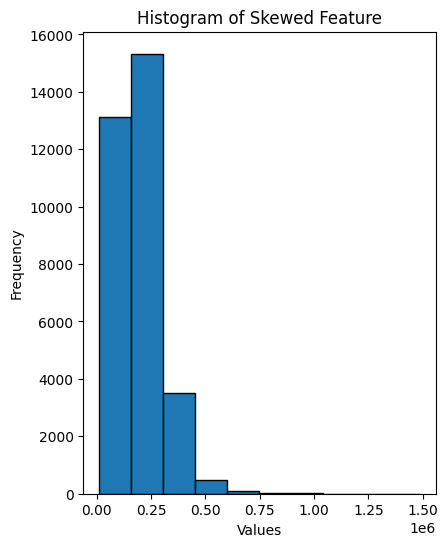

In [18]:
#Apply a transformation(eg.log transformation) to atleast one skewed numerical feature and justify your choice.

import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
plt.hist(df['fnlwgt'],bins=10,edgecolor='black')
plt.title('Histogram of Skewed Feature')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.show()

In [19]:
# Apply log transformation

import numpy as np
df['log_feature1'] = np.log(df['fnlwgt'])
df['log_feature1']

,log_feature1
0,11.258240
1,11.330336
2,12.281393
3,12.366153
4,12.732011
...,...
32556,12.458006
32557,11.947134
32558,11.931044
32559,12.213495


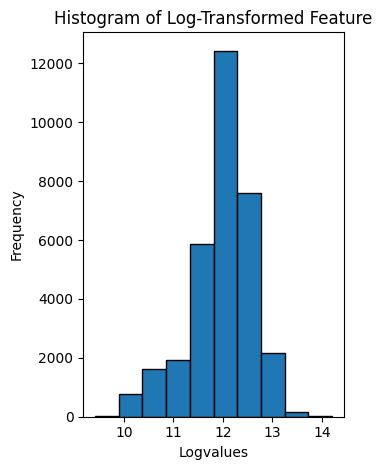

In [20]:
#plot histogram fot log-transformed feature

plt.subplot(1,2,2)
plt.hist(df['log_feature1'],bins=10,edgecolor='black')
plt.title('Histogram of Log-Transformed Feature')
plt.xlabel('Logvalues')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

####Feature Selection:

In [21]:
from sklearn.ensemble import IsolationForest
# Identify outliers using Isolation Forest
clf = IsolationForest(contamination=0.05,random_state=42)
outlier_preds = clf.fit_predict(df.dropna())
#Create a mask to identify outliers
outlier_mask = outlier_preds == -1
#Reamove outliers from the dataframe
df_no_outliers = df.loc[~outlier_mask]
#Display the dataframe after removing the outliers
print("\nDataFrame after removing outliers:")
df_no_outliers


DataFrame after removing outliers:


,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,capital_gain,capital_loss,hours_per_week,native_country,sex_ Male,income_ >50K,income_to_age_ratio,net_capital,log_feature1
0,39,7,77516,9,13,4,1,1,4,2174,0,40,39,1,0,1.025641,2174,11.258240
1,50,6,83311,9,13,2,4,0,4,0,0,13,39,1,0,0.260000,0,11.330336
2,38,4,215646,11,9,0,6,1,4,0,0,40,39,1,0,1.052632,0,12.281393
3,53,4,234721,1,7,2,6,0,2,0,0,40,39,1,0,0.754717,0,12.366153
4,28,4,338409,9,13,2,10,5,2,0,0,40,5,0,0,1.428571,0,12.732011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,4,257302,7,12,2,13,5,4,0,0,38,39,0,0,1.407407,0,12.458006
32557,40,4,154374,11,9,2,7,0,4,0,0,40,39,1,1,1.000000,0,11.947134
32558,58,4,151910,11,9,6,1,4,4,0,0,40,39,0,0,0.689655,0,11.931044
32559,22,4,201490,11,9,4,1,3,4,0,0,20,39,1,0,0.909091,0,12.213495


In [22]:
import ppscore as pps

In [23]:
pps_matrix = pps.matrix(df)
pps_matrix

,x,y,ppscore,case,is_valid_score,metric,baseline_score,model_score,model
0,age,age,1.0,predict_itself,True,None,0.000000,1.000000,None
1,age,workclass,0.0,regression,True,mean absolute error,0.742600,0.875681,DecisionTreeRegressor()
2,age,fnlwgt,0.0,regression,True,mean absolute error,75872.186200,77535.141544,DecisionTreeRegressor()
3,age,education,0.0,regression,True,mean absolute error,2.759000,2.806164,DecisionTreeRegressor()
4,age,education_num,0.0,regression,True,mean absolute error,1.853000,1.898306,DecisionTreeRegressor()
...,...,...,...,...,...,...,...,...,...
319,log_feature1,sex_ Male,0.0,regression,True,mean absolute error,0.336000,0.391500,DecisionTreeRegressor()
320,log_feature1,income_ >50K,0.0,regression,True,mean absolute error,0.242400,0.358333,DecisionTreeRegressor()
321,log_feature1,income_to_age_ratio,0.0,regression,True,mean absolute error,0.382552,0.519064,DecisionTreeRegressor()
322,log_feature1,net_capital,0.0,regression,True,mean absolute error,1188.826600,2326.705400,DecisionTreeRegressor()


In [24]:
#Calculate the correlation matrix (Pearson Correlation)

import seaborn as sns
correlation_matrix = df.corr(numeric_only=True)

#Display the correlation matrix
print("\Correlation Matrix:")
print(correlation_matrix)

\Correlation Matrix:
                          age  workclass    fnlwgt  education  education_num  \
age                  1.000000   0.003787 -0.076646  -0.010508       0.036527   
workclass            0.003787   1.000000 -0.016656   0.023513       0.052085   
fnlwgt              -0.076646  -0.016656  1.000000  -0.028145      -0.043195   
education           -0.010508   0.023513 -0.028145   1.000000       0.359153   
education_num        0.036527   0.052085 -0.043195   0.359153       1.000000   
marital_status      -0.266288  -0.064731  0.028153  -0.038407      -0.069304   
occupation          -0.020947   0.254892  0.001597  -0.021260       0.109697   
relationship        -0.263698  -0.090461  0.008931  -0.010876      -0.094153   
race                 0.028718   0.049742 -0.021291   0.014131       0.031838   
capital_gain         0.077674   0.033835  0.000432   0.030046       0.122630   
capital_loss         0.057775   0.012216 -0.010252   0.016746       0.079923   
hours_per_week     

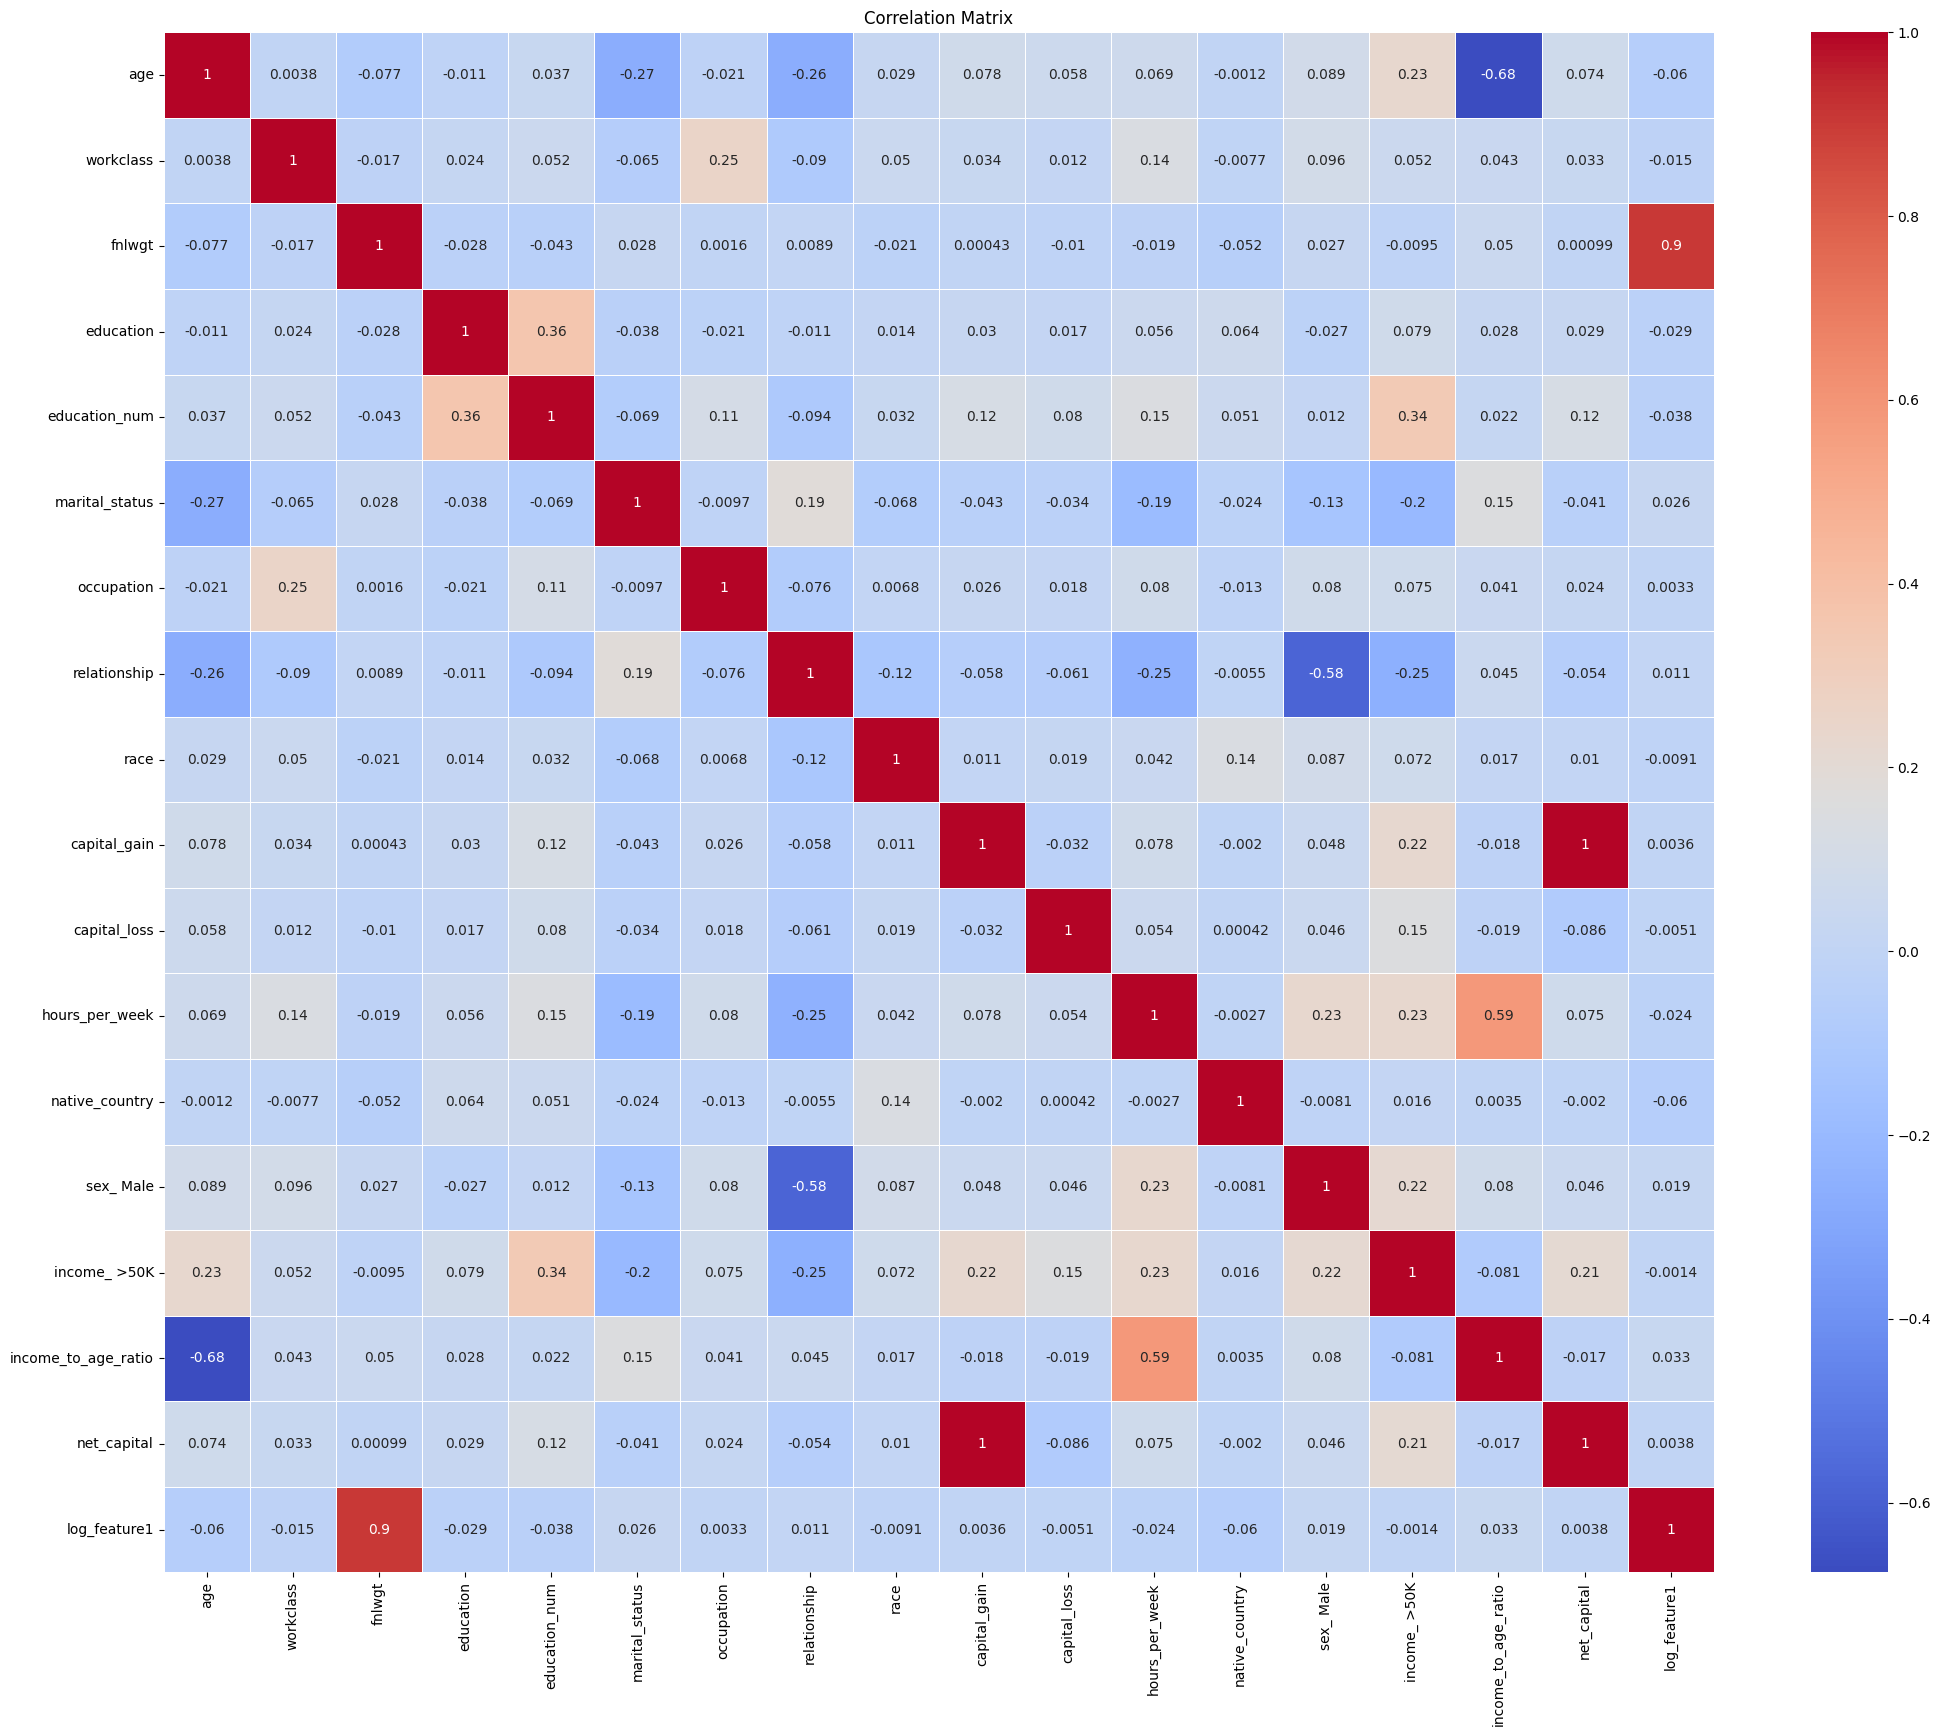

In [26]:
# Plotting the correlation matrix as a heatmap
plt.figure(figsize=(25,20))
sns.heatmap(correlation_matrix,annot=True,cmap='coolwarm',linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()